<a href="https://colab.research.google.com/github/HangBuiC/HTM737/blob/main/2025FA_BOS_HTM_737A_Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df_clinical_care = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/hvbp_clinical_care_11_07_2017.csv')
df_clinical_care.head()

,Provider Number,Hospital Name,Address,City,State,ZIP Code,County Name,MORT-30-AMI Achievement Threshold,MORT-30-AMI Benchmark,MORT-30-AMI Baseline Rate,...,MORT-30-HF Achievement Points,MORT-30-HF Improvement Points,MORT-30-HF Measure Score,MORT-30-PN Achievement Threshold,MORT-30-PN Benchmark,MORT-30-PN Baseline Rate,MORT-30-PN Performance Rate,MORT-30-PN Achievement Points,MORT-30-PN Improvement Points,MORT-30-PN Measure Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,Houston,0.850916,0.873053,0.850186,...,1 out of 10,0 out of 9,1 out of 10,0.88286,0.9079,0.877181,0.893777,4 out of 10,5 out of 9,5 out of 10
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,Marshall,0.850916,0.873053,0.836946,...,0 out of 10,0 out of 9,0 out of 10,0.88286,0.9079,0.858520,0.851953,0 out of 10,0 out of 9,0 out of 10
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,Lauderdale,0.850916,0.873053,0.818278,...,0 out of 10,0 out of 9,0 out of 10,0.88286,0.9079,0.848835,0.872522,0 out of 10,4 out of 9,4 out of 10
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,Covington,0.850916,0.873053,0.843930,...,0 out of 10,0 out of 9,0 out of 10,0.88286,0.9079,0.836245,0.849107,0 out of 10,1 out of 9,1 out of 10
4,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,Jefferson,0.850916,0.873053,0.834080,...,0 out of 10,0 out of 9,0 out of 10,0.88286,0.9079,0.823954,0.883768,1 out of 10,7 out of 9,7 out of 10


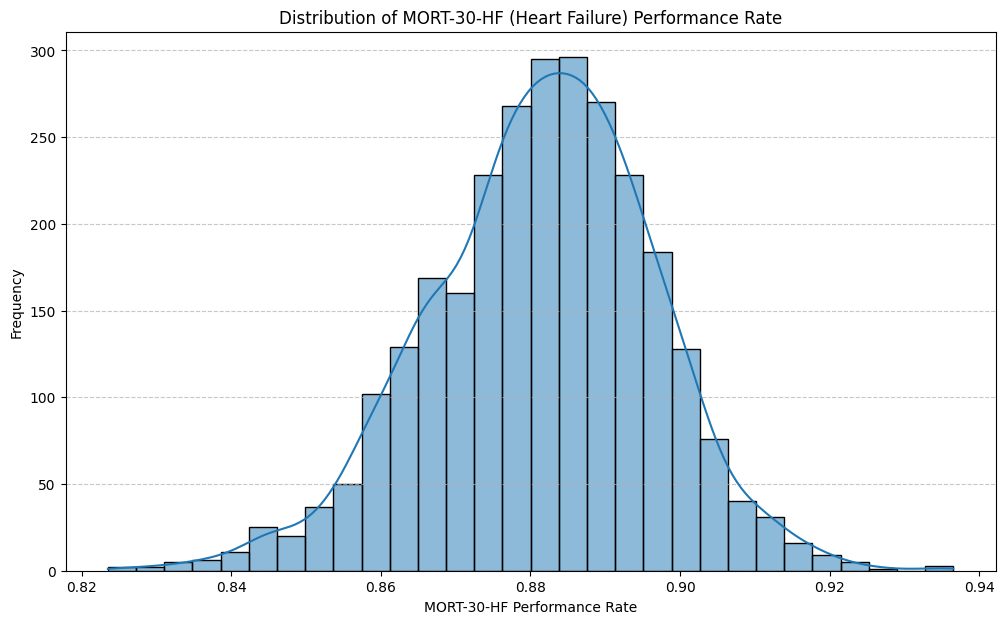

In [5]:
#Import plotting library
import matplotlib.pyplot as plt
import seaborn as sns

#Convert 2 columns to numeric
df_clinical_care['MORT-30-HF Performance Rate'] = pd.to_numeric(df_clinical_care['MORT-30-HF Performance Rate'], errors='coerce')
df_clinical_care['MORT-30-HF Benchmark'] = pd.to_numeric(df_clinical_care['MORT-30-HF Benchmark'], errors='coerce')

#Drop rows with missing values
df_clinical_care_cleaned_hf = df_clinical_care.dropna(subset=['MORT-30-HF Performance Rate', 'MORT-30-HF Benchmark'])

#Create a histogram with 30 bins
plt.figure(figsize=(12, 7))
sns.histplot(df_clinical_care_cleaned_hf['MORT-30-HF Performance Rate'], bins=30, kde=True)

#Style the plot with title,labels and grid.
plt.title('Distribution of MORT-30-HF (Heart Failure) Performance Rate')
plt.xlabel('MORT-30-HF Performance Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
#Calculate mean.
mean_mort_30_hf_performance_rate = df_clinical_care_cleaned_hf['MORT-30-HF Performance Rate'].mean()
print(f"Mean of 'MORT-30-HF Performance Rate': {mean_mort_30_hf_performance_rate:.4f}")

#Count number of hospitals above benchmark (don't count those with missing values)
hospitals_above_benchmark = df_clinical_care_cleaned_hf[
    df_clinical_care_cleaned_hf['MORT-30-HF Performance Rate'] > df_clinical_care_cleaned_hf['MORT-30-HF Benchmark']
].shape[0]

#Count total number of hospitals (don't count those with missing values)
total_hospitals_hf = df_clinical_care_cleaned_hf.shape[0]

#Calculate % of hospitals with performance rate above benchmark
percentage_above_benchmark = (hospitals_above_benchmark / total_hospitals_hf) * 100

print(f"Number of hospitals with performance rate above benchmark: {hospitals_above_benchmark}")
print(f"Total hospitals with valid performance rates and benchmarks: {total_hospitals_hf}")
print(f"Percentage of hospitals with performance rate above benchmark: {percentage_above_benchmark:.2f}%")

Mean of 'MORT-30-HF Performance Rate': 0.8815
Number of hospitals with performance rate above benchmark: 96
Total hospitals with valid performance rates and benchmarks: 2796
Percentage of hospitals with performance rate above benchmark: 3.43%


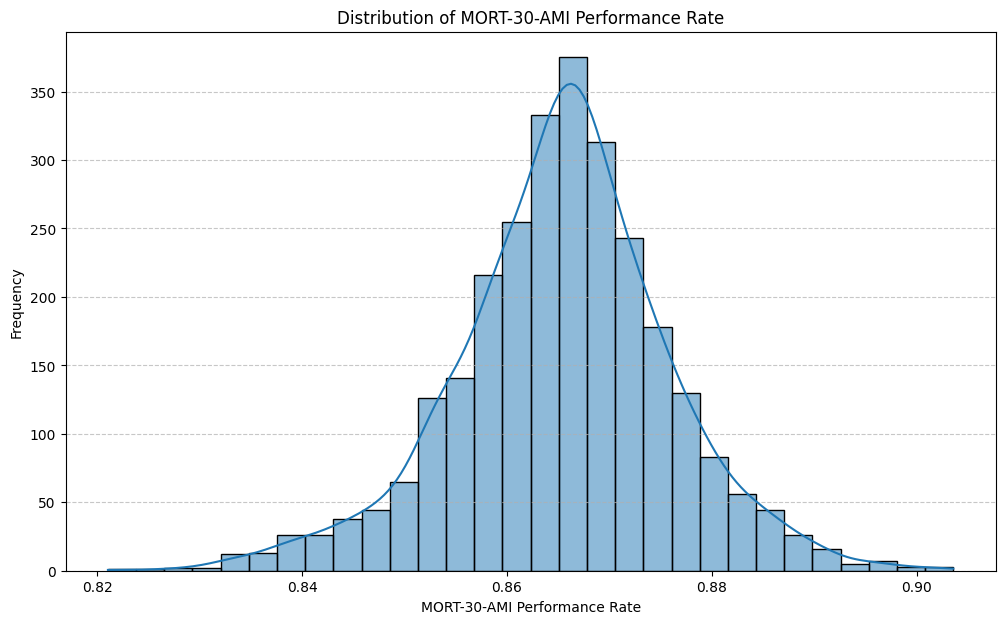

In [7]:
#Import plotting library
import matplotlib.pyplot as plt
import seaborn as sns

#Convert column to numeric
df_clinical_care['MORT-30-AMI Performance Rate'] = pd.to_numeric(df_clinical_care['MORT-30-AMI Performance Rate'], errors='coerce')

#Drop rows with missing values.
df_clinical_care_cleaned_ami = df_clinical_care.dropna(subset=['MORT-30-AMI Performance Rate'])

#Create histogram with 30 bins
plt.figure(figsize=(12, 7))
sns.histplot(df_clinical_care_cleaned_ami['MORT-30-AMI Performance Rate'], bins=30, kde=True)

#Style the histogram with title, labels and grid.
plt.title('Distribution of MORT-30-AMI Performance Rate')
plt.xlabel('MORT-30-AMI Performance Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
#Count the number of hospitals with performance rate above achievement threshold and below benchmark
hospitals_between_thresholds = df_clinical_care_cleaned_hf[
    (df_clinical_care_cleaned_hf['MORT-30-HF Performance Rate'] > df_clinical_care_cleaned_hf['MORT-30-HF Achievement Threshold']) &
    (df_clinical_care_cleaned_hf['MORT-30-HF Performance Rate'] < df_clinical_care_cleaned_hf['MORT-30-HF Benchmark'])
].shape[0]

#Count total hospitals with valid performance rates and benchmarks
total_hospitals_hf = df_clinical_care_cleaned_hf.shape[0]

#Calculate % of hospitals with performance rate above achievement threshold and below benchmark
percentage_between_thresholds = (hospitals_between_thresholds / total_hospitals_hf) * 100

print(f"Number of hospitals with performance rate above achievement threshold and below benchmark: {hospitals_between_thresholds}")
print(f"Total hospitals with valid performance rates and benchmarks: {total_hospitals_hf}")
print(f"Percentage of hospitals with performance rate above achievement threshold and below benchmark: {percentage_between_thresholds:.2f}%")

Number of hospitals with performance rate above achievement threshold and below benchmark: 1222
Total hospitals with valid performance rates and benchmarks: 2796
Percentage of hospitals with performance rate above achievement threshold and below benchmark: 43.71%


In [9]:
#Calculate mean
mean_mort_30_hf_performance_rate = df_clinical_care_cleaned_hf['MORT-30-HF Performance Rate'].mean()
print(f"Mean of 'MORT-30-HF Performance Rate': {mean_mort_30_hf_performance_rate:.4f}")

#Count the number of hospitals with performance rate below achievement threshold
hospitals_below_threshold = df_clinical_care_cleaned_hf[
    df_clinical_care_cleaned_hf['MORT-30-HF Performance Rate'] < df_clinical_care_cleaned_hf['MORT-30-HF Achievement Threshold']
].shape[0]

#Count total hospitals with valid performance rates and achievement thresholds
total_hospitals_hf = df_clinical_care_cleaned_hf.shape[0]

#Count % of hospitals with performance rate below achievement threshold
percentage_below_threshold = (hospitals_below_threshold / total_hospitals_hf) * 100

print(f"Number of hospitals with performance rate below achievement threshold: {hospitals_below_threshold}")
print(f"Total hospitals with valid performance rates and achievement thresholds: {total_hospitals_hf}")
print(f"Percentage of hospitals with performance rate below achievement threshold: {percentage_below_threshold:.2f}%")

Mean of 'MORT-30-HF Performance Rate': 0.8815
Number of hospitals with performance rate below achievement threshold: 1478
Total hospitals with valid performance rates and achievement thresholds: 2796
Percentage of hospitals with performance rate below achievement threshold: 52.86%


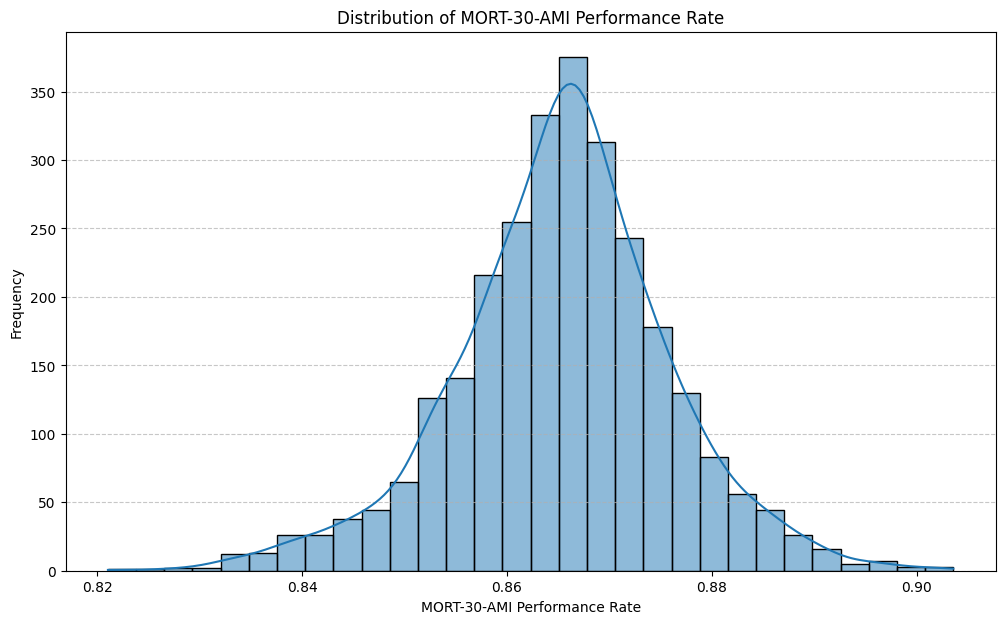

In [10]:
#Import plotting library
import matplotlib.pyplot as plt
import seaborn as sns

#Convert column to numeric
df_clinical_care['MORT-30-AMI Performance Rate'] = pd.to_numeric(df_clinical_care['MORT-30-AMI Performance Rate'], errors='coerce')

#Drop rows with missing values
df_clinical_care_cleaned_ami = df_clinical_care.dropna(subset=['MORT-30-AMI Performance Rate'])

#Create histogram with 30 bins
plt.figure(figsize=(12, 7))
sns.histplot(df_clinical_care_cleaned_ami['MORT-30-AMI Performance Rate'], bins=30, kde=True)

#Style with title, labels and grid.
plt.title('Distribution of MORT-30-AMI Performance Rate')
plt.xlabel('MORT-30-AMI Performance Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
#Calculate mean
mean_mort_30_ami_performance_rate = df_clinical_care_cleaned_ami['MORT-30-AMI Performance Rate'].mean()
print(f"Mean of 'MORT-30-AMI Performance Rate': {mean_mort_30_ami_performance_rate:.4f}")

#Count the number of hospitals with performance rate lower than threshold 0.850916
threshold = 0.850916
hospitals_below_threshold_ami = df_clinical_care_cleaned_ami[
    df_clinical_care_cleaned_ami['MORT-30-AMI Performance Rate'] < threshold
].shape[0]

#Count total hospitals with valid performance rates
total_hospitals_ami = df_clinical_care_cleaned_ami.shape[0]

#Calculate % of hospitals with performance rate lower than threshold
percentage_below_threshold_ami = (hospitals_below_threshold_ami / total_hospitals_ami) * 100

print(f"Number of hospitals with performance rate lower than {threshold}: {hospitals_below_threshold_ami}")
print(f"Total hospitals with valid performance rates: {total_hospitals_ami}")
print(f"Percentage of hospitals with performance rate lower than {threshold}: {percentage_below_threshold_ami:.2f}%")

Mean of 'MORT-30-AMI Performance Rate': 0.8654
Number of hospitals with performance rate lower than 0.850916: 218
Total hospitals with valid performance rates: 2783
Percentage of hospitals with performance rate lower than 0.850916: 7.83%


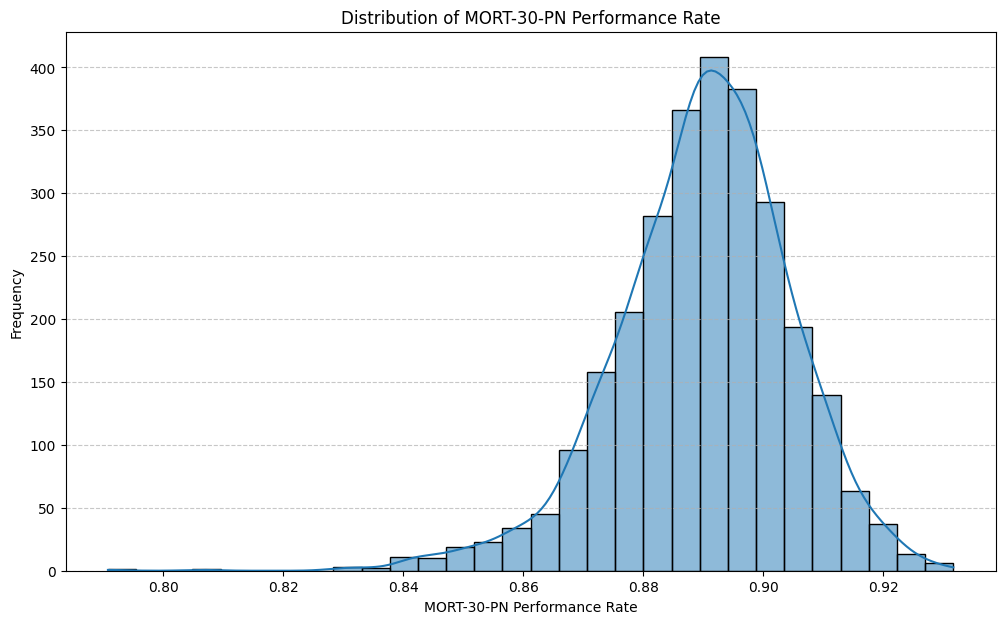

In [13]:
#Import plotting library
import matplotlib.pyplot as plt
import seaborn as sns

#Convert column to numeric
df_clinical_care['MORT-30-PN Performance Rate'] = pd.to_numeric(df_clinical_care['MORT-30-PN Performance Rate'], errors='coerce')

#Drop rows with missing values
df_clinical_care_cleaned = df_clinical_care.dropna(subset=['MORT-30-PN Performance Rate'])

#Create histogram with 30 bins.
plt.figure(figsize=(12, 7))
sns.histplot(df_clinical_care_cleaned['MORT-30-PN Performance Rate'], bins=30, kde=True)

#Style with title, label and grid.
plt.title('Distribution of MORT-30-PN Performance Rate')
plt.xlabel('MORT-30-PN Performance Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
#Calculate mean
mean_mort_30_pn_performance_rate = df_clinical_care_cleaned['MORT-30-PN Performance Rate'].mean()
print(f"Mean of 'MORT-30-PN Performance Rate': {mean_mort_30_pn_performance_rate:.4f}")

#Count number of hospitals with performance rate higher than threshold
threshold = 0.9079
hospitals_above_threshold = df_clinical_care_cleaned[
    df_clinical_care_cleaned['MORT-30-PN Performance Rate'] > threshold
].shape[0]

#Count total hospitals with valid performance rates
total_hospitals = df_clinical_care_cleaned.shape[0]
percentage_above_threshold = (hospitals_above_threshold / total_hospitals) * 100

print(f"Number of hospitals with performance rate higher than {threshold}: {hospitals_above_threshold}")
print(f"Total hospitals with valid performance rates: {total_hospitals}")
print(f"Percentage of hospitals with performance rate lower than {threshold}: {percentage_above_threshold:.2f}%")

Mean of 'MORT-30-PN Performance Rate': 0.8900
Number of hospitals with performance rate higher than 0.9079: 270
Total hospitals with valid performance rates: 2794
Percentage of hospitals with performance rate lower than 0.9079: 9.66%


In [16]:
df_efficiency = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/hvbp_efficiency_11_07_2017.csv')
df_efficiency.head()

,Provider_Number,Hospital_Name,Address,City,State,ZIP_Code,County_Name,MSPB-1 Achievement Threshold,MSPB-1 Benchmark,MSPB-1 Baseline Rate,MSPB-1 Performance Rate,MSPB-1 Achievement Points,MSPB-1 Improvement Points,MSPB-1 Measure Score
0,110215,PIEDMONT FAYETTE HOSPITAL,1255 HIGHWAY 54 WEST,FAYETTEVILLE,GA,30214,Fayette,0.985777,0.832678,0.950527,0.962057,2 out of 10,0 out of 9,2 out of 10
1,230236,METRO HEALTH HOSPITAL,"5900 BYRON CENTER AVENUE, SW",WYOMING,MI,49519,Kent,0.985777,0.832678,0.921788,0.939953,3 out of 10,0 out of 9,3 out of 10
2,520019,MINISTRY SAINT MARYS HOSPITAL,2251 NORTH SHORE DR,RHINELANDER,WI,54501,Oneida,0.985777,0.832678,0.843599,0.832790,9 out of 10,9 out of 9,9 out of 10
3,340141,NEW HANOVER REGIONAL MEDICAL CENTER,2131 S 17TH ST BOX 9000,WILMINGTON,NC,28402,New Hanover,0.985777,0.832678,0.966919,0.967548,2 out of 10,0 out of 9,2 out of 10
4,200020,YORK HOSPITAL,15 HOSPITAL DRIVE,YORK,ME,3909,York,0.985777,0.832678,0.966664,0.970079,1 out of 10,0 out of 9,1 out of 10


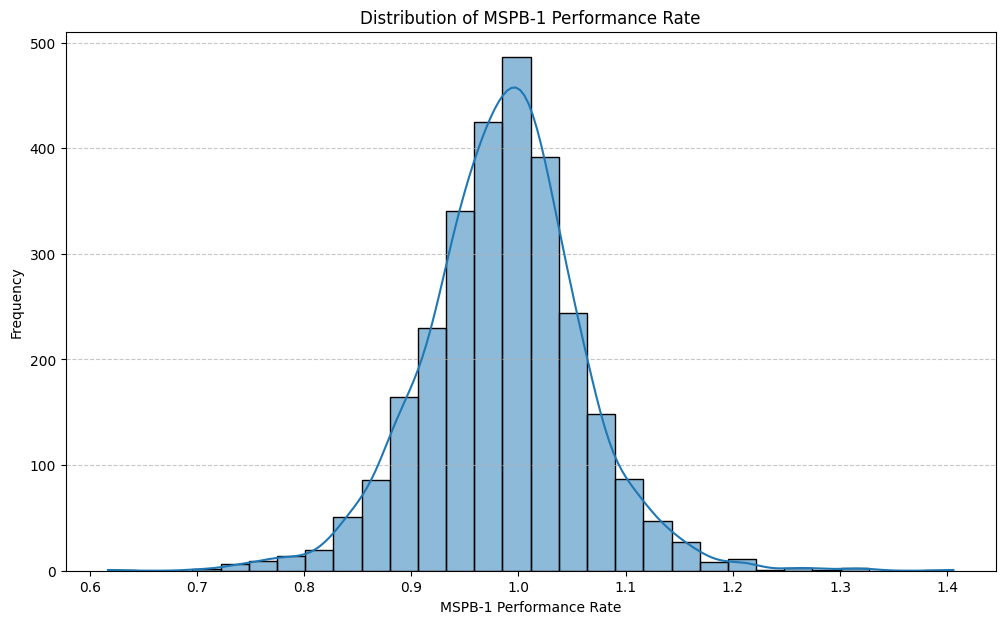

In [17]:
#Import plotting library
import matplotlib.pyplot as plt
import seaborn as sns

#Convert column to numeric
df_efficiency['MSPB-1 Performance Rate'] = pd.to_numeric(df_efficiency['MSPB-1 Performance Rate'], errors='coerce')

#Drop rows with missing values
df_efficiency_cleaned = df_efficiency.dropna(subset=['MSPB-1 Performance Rate'])

#Create histogram with 30 bins
plt.figure(figsize=(12, 7))
sns.histplot(df_efficiency_cleaned['MSPB-1 Performance Rate'], bins=30, kde=True)

#Style with title, labels and grid
plt.title('Distribution of MSPB-1 Performance Rate')
plt.xlabel('MSPB-1 Performance Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
#Calculate Mean
mean_performance_rate = df_efficiency_cleaned['MSPB-1 Performance Rate'].mean()
print(f"Mean of 'MSPB-1 Performance Rate': {mean_performance_rate:.4f}")

#Count number of hospitals with performance rate above 0.832678
threshold = 0.832678
hospitals_above_threshold = df_efficiency_cleaned[df_efficiency_cleaned['MSPB-1 Performance Rate'] > threshold].shape[0]

#Count total hospitals with valid performance rates
total_hospitals = df_efficiency_cleaned.shape[0]

#Calculate % of hospitals with performance rate above 0.832678
percentage_above_threshold = (hospitals_above_threshold / total_hospitals) * 100

print(f"Number of hospitals with performance rate above {threshold}: {hospitals_above_threshold}")
print(f"Total hospitals with valid performance rates: {total_hospitals}")
print(f"Percentage of hospitals with performance rate above {threshold}: {percentage_above_threshold:.2f}%")

Mean of 'MSPB-1 Performance Rate': 0.9859
Number of hospitals with performance rate above 0.832678: 2751
Total hospitals with valid performance rates: 2808
Percentage of hospitals with performance rate above 0.832678: 97.97%


In [22]:
#Count number of hospitals with performance rate between 0.832678 and 0.985777
lower_threshold = 0.832678
upper_threshold = 0.985777
hospitals_in_range = df_efficiency_cleaned[
    (df_efficiency_cleaned['MSPB-1 Performance Rate'] > lower_threshold) &
    (df_efficiency_cleaned['MSPB-1 Performance Rate'] < upper_threshold)
].shape[0]

total_hospitals = df_efficiency_cleaned.shape[0]

#Calculate percentage of hospitals with performance rate between 0.832678 and 0.985777
percentage_in_range = (hospitals_in_range / total_hospitals) * 100

print(f"Number of hospitals with performance rate between {lower_threshold} and {upper_threshold}: {hospitals_in_range}")
print(f"Total hospitals with valid performance rates: {total_hospitals}")
print(f"Percentage of hospitals with performance rate between {lower_threshold} and {upper_threshold}: {percentage_in_range:.2f}%")

Number of hospitals with performance rate between 0.832678 and 0.985777: 1308
Total hospitals with valid performance rates: 2808
Percentage of hospitals with performance rate between 0.832678 and 0.985777: 46.58%


In [23]:
df_hcahps = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/hvbp_hcahps_11_07_2017.csv')
df_hcahps.head()

,Provider Number,Hospital Name,Address,City,State,ZIP Code,County Name,Communication with Nurses Floor,Communication with Nurses Achievement Threshold,Communication with Nurses Benchmark,...,Overall Rating of Hospital Floor,Overall Rating of Hospital Achievement Threshold,Overall Rating of Hospital Benchmark,Overall Rating of Hospital Baseline Rate,Overall Rating of Hospital Performance Rate,Overall Rating of Hospital Achievement Points,Overall Rating of Hospital Improvement Points,Overall Rating of Hospital Dimension Score,HCAHPS Base Score,HCAHPS Consistency Score
0,240040,UNIVERSITY MEDICAL CENTER-MESABI/ MESABA CLINICS,750 EAST 34TH ST,HIBBING,MN,55746,Saint Louis,55.27,78.52,86.68,...,37.67,70.23,84.58,69.20,72.81,2 out of 10,2 out of 9,2 out of 10,29,19
1,450055,ROLLING PLAINS MEMORIAL HOSPITAL,200 E ARIZONA,SWEETWATER,TX,79556,Nolan,55.27,78.52,86.68,...,37.67,70.23,84.58,73.47,79.06,6 out of 10,5 out of 9,6 out of 10,49,20
2,50367,NORTHBAY MEDICAL CENTER,1200 B GALE WILSON BLVD,FAIRFIELD,CA,94533,Solano,55.27,78.52,86.68,...,37.67,70.23,84.58,69.92,71.60,1 out of 10,1 out of 9,1 out of 10,10,13
3,360096,EAST LIVERPOOL CITY HOSPITAL,425 WEST 5TH STREET,EAST LIVERPOOL,OH,43920,Columbiana,55.27,78.52,86.68,...,37.67,70.23,84.58,60.70,70.32,1 out of 10,4 out of 9,4 out of 10,29,16
4,230130,"BEAUMONT HOSPITAL, ROYAL OAK",3601 W THIRTEEN MILE RD,ROYAL OAK,MI,48073,Oakland,55.27,78.52,86.68,...,37.67,70.23,84.58,72.39,73.51,3 out of 10,0 out of 9,3 out of 10,7,14


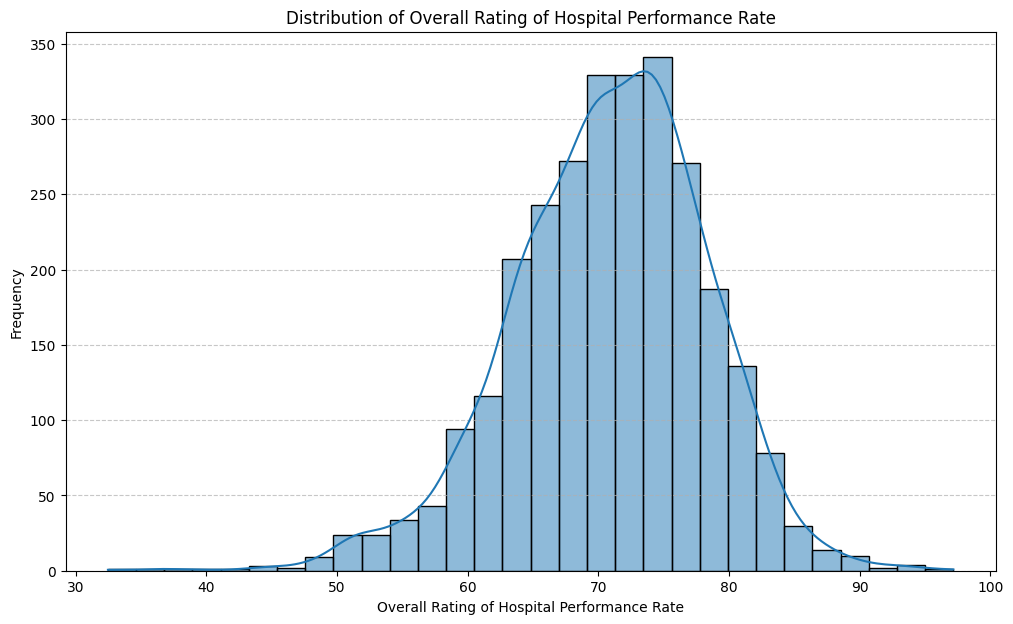

In [24]:
#Import plotting library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_hcahps = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/hvbp_hcahps_11_07_2017.csv')

#Convert column to numeric
df_hcahps['Overall Rating of Hospital Performance Rate'] = pd.to_numeric(df_hcahps['Overall Rating of Hospital Performance Rate'], errors='coerce')

#Clean rows with missing values
df_hcahps_cleaned = df_hcahps.dropna(subset=['Overall Rating of Hospital Performance Rate'])

#Create histogram with 30 bins
plt.figure(figsize=(12, 7))
sns.histplot(df_hcahps_cleaned['Overall Rating of Hospital Performance Rate'], bins=30, kde=True)
plt.title('Distribution of Overall Rating of Hospital Performance Rate')
plt.xlabel('Overall Rating of Hospital Performance Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
mean_overall_rating = df_hcahps_cleaned['Overall Rating of Hospital Performance Rate'].mean()
print(f"Mean of 'Overall Rating of Hospital Performance Rate': {mean_overall_rating:.2f}")
upper_threshold = 84.58
hospitals_above_upper_threshold = df_hcahps_cleaned[
    df_hcahps_cleaned['Overall Rating of Hospital Performance Rate'] > upper_threshold
].shape[0]
lower_threshold = 70.23
hospitals_below_lower_threshold = df_hcahps_cleaned[
    df_hcahps_cleaned['Overall Rating of Hospital Performance Rate'] < lower_threshold
].shape[0]

total_hospitals_hcahps = df_hcahps_cleaned.shape[0]
percentage_above_upper_threshold = (hospitals_above_upper_threshold / total_hospitals_hcahps) * 100
percentage_below_lower_threshold = (hospitals_below_lower_threshold / total_hospitals_hcahps) * 100

print(f"Number of hospitals with performance rate higher than {upper_threshold}: {hospitals_above_upper_threshold}")
print(f"Percentage of hospitals with performance rate higher than {upper_threshold}: {percentage_above_upper_threshold:.2f}%")
print(f"\nNumber of hospitals with performance rate lower than {lower_threshold}: {hospitals_below_lower_threshold}")
print(f"Percentage of hospitals with performance rate lower than {lower_threshold}: {percentage_below_lower_threshold:.2f}%")
print(f"\nTotal hospitals with valid performance rates: {total_hospitals_hcahps}")

Mean of 'Overall Rating of Hospital Performance Rate': 70.81
Number of hospitals with performance rate higher than 84.58: 53
Percentage of hospitals with performance rate higher than 84.58: 1.89%

Number of hospitals with performance rate lower than 70.23: 1253
Percentage of hospitals with performance rate lower than 70.23: 44.62%

Total hospitals with valid performance rates: 2808


In [26]:
df_safety = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/hvbp_safety_11_07_2017.csv')
df_safety.head()

,Provider Number,Hospital Name,Address,City,State,ZIP Code,County Name,PSI-90 Achievement Threshold,PSI-90 Benchmark,PSI-90 Baseline Rate,...,HAI-6 Achievement Points,HAI-6 Improvement Points,HAI-6 Measure Score,PC-01 Achievement Threshold,PC-01 Benchmark,PC-01 Baseline Rate,PC-01 Performance Rate,PC-01 Achievement Points,PC-01 Improvement Points,PC-01 Measure Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,Houston,0.964542,0.709498,1.009846,...,6 out of 10,7 out of 9,7 out of 10,0.020408,0.0,0.000000,0.000000,10 out of 10,0 out of 9,10 out of 10
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,Marshall,0.964542,0.709498,0.798330,...,9 out of 10,8 out of 9,9 out of 10,0.020408,0.0,0.295858,0.021739,0 out of 10,9 out of 9,9 out of 10
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,Lauderdale,0.964542,0.709498,1.253606,...,5 out of 10,3 out of 9,5 out of 10,0.020408,0.0,0.027027,0.000000,10 out of 10,9 out of 9,10 out of 10
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,Covington,0.964542,0.709498,1.101822,...,Not Available,Not Available,Not Available,0.020408,0.0,Not Available,Not Available,Not Available,Not Available,Not Available
4,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,Jefferson,0.964542,0.709498,0.864237,...,3 out of 10,3 out of 9,3 out of 10,0.020408,0.0,0.058824,0.000000,10 out of 10,9 out of 9,10 out of 10


In [27]:
df_tps = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/hvbp_tps_11_07_2017.csv')
df_tps.head()

,Provider Number,Hospital Name,Address,City,State,Zip Code,County Name,Unweighted Normalized Clinical Care Domain Score,Weighted Normalized Clinical Care Domain Score,Unweighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score,Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score,Unweighted Normalized Safety Domain Score,Weighted Safety Domain Score,Unweighted Normalized Efficiency and Cost Reduction Domain Score,Weighted Efficiency and Cost Reduction Domain Score,Total Performance Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,Houston,43.333333333333,10.833333333333,26.000000000000,6.500000000000,72.857142857143,18.214285714286,0.000000000000,0.000000000000,35.547619047619
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,Marshall,16.666666666667,4.166666666667,36.000000000000,9.000000000000,81.428571428571,20.357142857143,0.000000000000,0.000000000000,33.523809523810
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,Lauderdale,26.666666666667,6.666666666667,17.000000000000,4.250000000000,47.142857142857,11.785714285714,0.000000000000,0.000000000000,22.702380952381
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,Covington,26.666666666667,8.888888888889,56.000000000000,18.666666666667,Not Available,Not Available,0.000000000000,0.000000000000,27.555555555556
4,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,Jefferson,46.666666666667,11.666666666667,25.000000000000,6.250000000000,42.857142857143,10.714285714286,0.000000000000,0.000000000000,28.630952380952


In [28]:
pathname = 'https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/'
files_of_interest = [
    'hvbp_tps_11_07_2017.csv',
    'hvbp_clinical_care_11_07_2017.csv',
    'hvbp_safety_11_07_2017.csv',
    'hvbp_efficiency_11_07_2017.csv',
    'hvbp_hcahps_11_07_2017.csv'
]

dfs = {
    foi: pd.read_csv(pathname + foi, header=0) for foi in files_of_interest #Header=0 means taking the 1st row. (remind: in python we start from 0)
}

In [29]:
#Based on the U.S. Census Bureau, we devide the database into 4 regions to compare: MidWest, NorthEast, South and West.
region_mapping = {
    'ME': 'NorthEast', 'VT': 'NorthEast', 'NH': 'NorthEast', 'MA': 'NorthEast', 'RI': 'NorthEast', 'CT': 'NorthEast', 'NY': 'NorthEast', 'PA': 'NorthEast', 'NJ': 'NorthEast',
    'MI': 'MidWest', 'WI': 'MidWest', 'IL': 'MidWest', 'IN': 'MidWest', 'OH': 'MidWest', 'MN': 'MidWest', 'IA': 'MidWest', 'MO': 'MidWest', 'ND': 'MidWest', 'SD': 'MidWest', 'NE': 'MidWest', 'KS': 'MidWest',
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South', 'WV': 'South', 'KY': 'South', 'TN': 'South', 'NC': 'South', 'SC': 'South', 'GA': 'South', 'FL': 'South', 'AL': 'South', 'MS': 'South', 'AR': 'South', 'LA': 'South', 'OK': 'South', 'TX': 'South',
    'WA': 'West', 'OR': 'West', 'CA': 'West', 'NV': 'West', 'ID': 'West', 'MT': 'West', 'WY': 'West', 'UT': 'West', 'CO': 'West', 'AZ': 'West', 'NM': 'West', 'AK': 'West', 'HI': 'West'
}

#Count number of state in each region
df_clinical_care['Region'] = df_clinical_care['State'].map(region_mapping)
display(df_clinical_care['Region'].value_counts())


,count
Region,
South,1112
MidWest,675
West,555
NorthEast,466


/tmp/ipython-input-4074165288.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total Performance Score', data=regional_performance, palette='viridis')


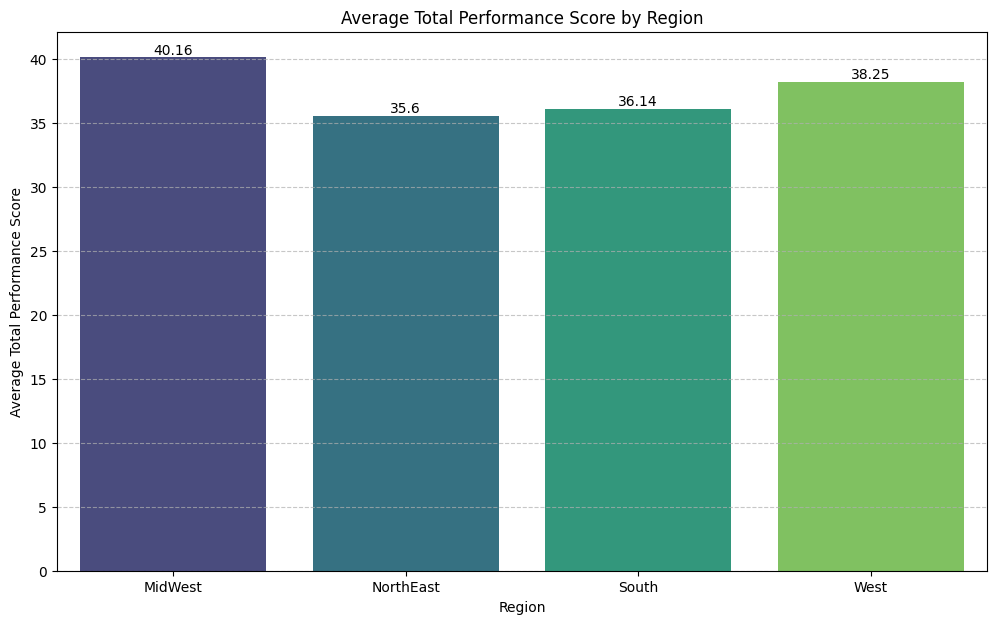

In [30]:
df_tps['Region'] = df_tps['State'].map(region_mapping)

#Convert column to numeric and drop rows with missing values
df_tps['Total Performance Score'] = pd.to_numeric(df_tps['Total Performance Score'], errors='coerce')

regional_performance = df_tps.groupby('Region')['Total Performance Score'].mean().reset_index()

#Import plotting library
import matplotlib.pyplot as plt
import seaborn as sns

#Create bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Region', y='Total Performance Score', data=regional_performance, palette='viridis')

#Style the bar chart with title, labels, grid and color
plt.title('Average Total Performance Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Total Performance Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, row in regional_performance.iterrows():
    plt.text(row.name, row['Total Performance Score'], round(row['Total Performance Score'], 2), color='black', ha="center", va="bottom")

plt.show()


In [31]:
#Convert the 2 MORT-30-HF columns to numeric, turn invalid numbers into NaN
df_clinical_care['MORT-30-HF Performance Rate'] = pd.to_numeric(df_clinical_care['MORT-30-HF Performance Rate'], errors='coerce')
df_clinical_care['MORT-30-HF Achievement Threshold'] = pd.to_numeric(df_clinical_care['MORT-30-HF Achievement Threshold'], errors='coerce')

#Drop rows with missing performance, threshold or region
df_hf_regional = df_clinical_care.dropna(subset=['MORT-30-HF Performance Rate', 'MORT-30-HF Achievement Threshold', 'Region']).copy()

#Identify hospitals below the achievement threshold
hospitals_below_threshold_per_region = df_hf_regional[
    df_hf_regional['MORT-30-HF Performance Rate'] < df_hf_regional['MORT-30-HF Achievement Threshold']
].groupby('Region').size().reset_index(name='Hospitals Below Threshold')

#Count all hospitals per region
total_hospitals_per_region = df_hf_regional.groupby('Region').size().reset_index(name='Total Hospitals')

#Merge the 2 datasets
regional_analysis = pd.merge(total_hospitals_per_region, hospitals_below_threshold_per_region, on='Region', how='left')

#Replace missing values with zero
regional_analysis['Hospitals Below Threshold'] = regional_analysis['Hospitals Below Threshold'].fillna(0)

#Calculate the % of poor-performing hospitals
regional_analysis['Percentage Below Achievement Threshold (%)'] = (
    (regional_analysis['Hospitals Below Threshold'] / regional_analysis['Total Hospitals']) * 100
)

print("Percentage of hospitals with MORT-30-HF Performance Rate below Achievement Threshold by Region:")
display(regional_analysis)

Percentage of hospitals with MORT-30-HF Performance Rate below Achievement Threshold by Region:


,Region,Total Hospitals,Hospitals Below Threshold,Percentage Below Achievement Threshold (%)
0,MidWest,672,364,54.166667
1,NorthEast,466,196,42.060086
2,South,1105,616,55.746606
3,West,553,302,54.611212


In [32]:
#Assign each hospital vs each region
df_hcahps['Region'] = df_hcahps['State'].map(region_mapping)

#Covert HCAHPS overal rating to numeric
df_hcahps['Overall Rating of Hospital Performance Rate'] = pd.to_numeric(df_hcahps['Overall Rating of Hospital Performance Rate'], errors='coerce')

#Create a cleaned dataset with complete data
df_hcahps_regional = df_hcahps.dropna(subset=['Overall Rating of Hospital Performance Rate', 'Region']).copy()

#Count hospitals below the threshold
lower_threshold = 70.23
hospitals_below_threshold_per_region_hcahps = df_hcahps_regional[
    df_hcahps_regional['Overall Rating of Hospital Performance Rate'] < lower_threshold
].groupby('Region').size().reset_index(name='Hospitals Below Threshold')

#Count hospitals in each region
total_hospitals_per_region_hcahps = df_hcahps_regional.groupby('Region').size().reset_index(name='Total Hospitals')

#Merge these 2 datasets
regional_analysis_hcahps = pd.merge(total_hospitals_per_region_hcahps, hospitals_below_threshold_per_region_hcahps, on='Region', how='left')

#Replace missing value with 0
regional_analysis_hcahps['Hospitals Below Threshold'] = regional_analysis_hcahps['Hospitals Below Threshold'].fillna(0)

#Compute % of poor-performing hospitals in each region
regional_analysis_hcahps['Percentage Below Threshold (%)'] = (
    (regional_analysis_hcahps['Hospitals Below Threshold'] / regional_analysis_hcahps['Total Hospitals']) * 100
)

print(f"Percentage of hospitals with Overall Rating of Hospital Performance Rate lower than {lower_threshold} by Region:")
display(regional_analysis_hcahps)

Percentage of hospitals with Overall Rating of Hospital Performance Rate lower than 70.23 by Region:


,Region,Total Hospitals,Hospitals Below Threshold,Percentage Below Threshold (%)
0,MidWest,675,224,33.185185
1,NorthEast,466,275,59.012876
2,South,1112,474,42.625899
3,West,555,280,50.450450


In [33]:
#Assign each hospital vs each region
df_efficiency['Region'] = df_efficiency['State'].map(region_mapping)

#Covert MSPB-1 Performance Rate to numeric
df_efficiency['MSPB-1 Performance Rate'] = pd.to_numeric(df_efficiency['MSPB-1 Performance Rate'], errors='coerce')

#Create a cleaned dataset with complete data
df_efficiency_regional = df_efficiency.dropna(subset=['MSPB-1 Performance Rate', 'Region']).copy()

#Count hospitals above the threshold
threshold = 0.985777
hospitals_above_threshold_per_region = df_efficiency_regional[
    df_efficiency_regional['MSPB-1 Performance Rate'] > threshold
].groupby('Region').size().reset_index(name='Hospitals Above Threshold')

#Count total hospitals in each region
total_hospitals_per_region = df_efficiency_regional.groupby('Region').size().reset_index(name='Total Hospitals')

#Merge these 2 datasets
regional_efficiency_analysis = pd.merge(total_hospitals_per_region, hospitals_above_threshold_per_region, on='Region', how='left')

#Replace missing value with 0
regional_efficiency_analysis['Hospitals Above Threshold'] = regional_efficiency_analysis['Hospitals Above Threshold'].fillna(0)

#Compute % of poor-performing hospitals in each region
regional_efficiency_analysis['Percentage Above Threshold (%)'] = (
    (regional_efficiency_analysis['Hospitals Above Threshold'] / regional_efficiency_analysis['Total Hospitals']) * 100
)

print(f"Percentage of hospitals with MSPB-1 Performance Rate above {threshold} by Region:")
display(regional_efficiency_analysis)

Percentage of hospitals with MSPB-1 Performance Rate above 0.985777 by Region:


,Region,Total Hospitals,Hospitals Above Threshold,Percentage Above Threshold (%)
0,MidWest,675,292,43.259259
1,NorthEast,466,297,63.733906
2,South,1112,647,58.183453
3,West,555,207,37.297297


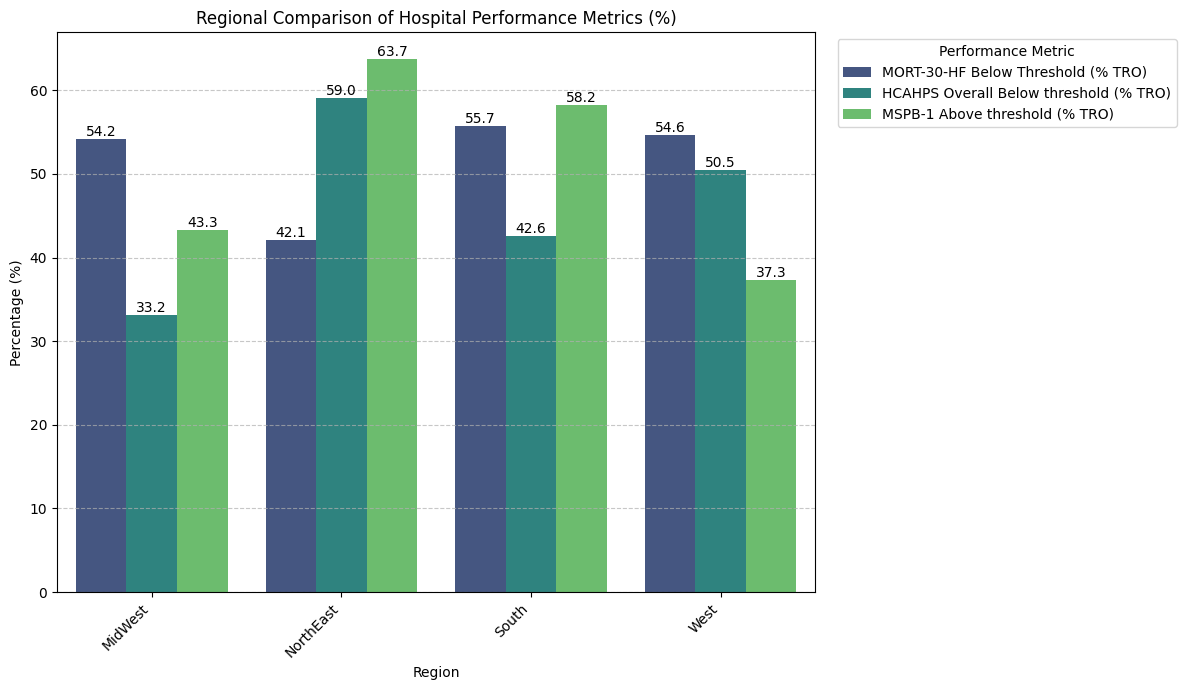

In [42]:
#Import plotting library
import matplotlib.pyplot as plt
import seaborn as sns

#Select and rename percentage metrics from 3 domains
df_mort_hf = regional_analysis[['Region', 'Percentage Below Achievement Threshold (%)']].rename(columns={
    'Percentage Below Achievement Threshold (%)': 'MORT-30-HF Below Threshold (% TRO)'
})
df_hcahps_overall = regional_analysis_hcahps[['Region', 'Percentage Below Threshold (%)']].rename(columns={
    'Percentage Below Threshold (%)': 'HCAHPS Overall Below threshold (% TRO)'
})
df_mspb = regional_efficiency_analysis[['Region', 'Percentage Above Threshold (%)']].rename(columns={
    'Percentage Above Threshold (%)': 'MSPB-1 Above threshold (% TRO)'
})

#Merge the 3 domain datasét by region
merged_percentages = pd.merge(df_mort_hf, df_hcahps_overall, on='Region', how='outer')
merged_percentages = pd.merge(merged_percentages, df_mspb, on='Region', how='outer')

#reshape the data for Seaborn
melted_percentages = merged_percentages.melt(id_vars='Region', var_name='Metric', value_name='Percentage')

#Create grouped bar chart
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Region', y='Percentage', hue='Metric', data=melted_percentages, palette='viridis')
plt.title('Regional Comparison of Hospital Performance Metrics (%)')
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Performance Metric', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Add numerical labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.show()

In [43]:
# Input population data from US Census, 2024.
population_data = {
    'South': 132665693,
    'West': 80015776,
    'MidWest': 69596584,
    'NorthEast': 57832935
}

df_population = pd.DataFrame(list(population_data.items()), columns=['Region', 'Population'])

hospitals_per_region = df_tps.groupby('Region')['Provider Number'].nunique().reset_index()
hospitals_per_region.rename(columns={'Provider Number': 'Number of Hospitals'}, inplace=True)

regional_hospitals_per_capita = pd.merge(hospitals_per_region, df_population, on='Region', how='left')

regional_hospitals_per_capita['Hospitals per Capita'] = (regional_hospitals_per_capita['Number of Hospitals'] / regional_hospitals_per_capita['Population']) * 1000000 # Scale to per million for better readability

display(regional_hospitals_per_capita)

,Region,Number of Hospitals,Population,Hospitals per Capita
0,MidWest,675,69596584,9.698752
1,NorthEast,466,57832935,8.057692
2,South,1112,132665693,8.381971
3,West,555,80015776,6.936132


/tmp/ipython-input-2599386772.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Hospitals per Capita', data=regional_hospitals_per_capita, palette='viridis')


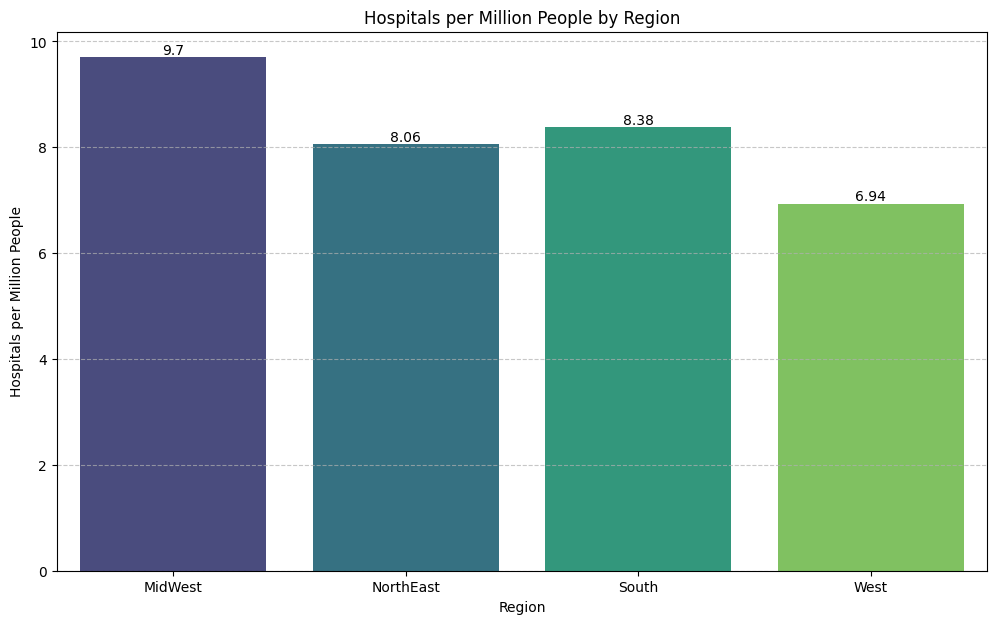

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x='Region', y='Hospitals per Capita', data=regional_hospitals_per_capita, palette='viridis')
plt.title('Hospitals per Million People by Region')
plt.xlabel('Region')
plt.ylabel('Hospitals per Million People')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, row in regional_hospitals_per_capita.iterrows():
    plt.text(row.name, row['Hospitals per Capita'], round(row['Hospitals per Capita'], 2), color='black', ha="center", va="bottom")

plt.show()

In [37]:
correlation_df = pd.merge(
    regional_hospitals_per_capita[['Region', 'Hospitals per Capita']],
    regional_performance[['Region', 'Total Performance Score']],
    on='Region',
    how='left'
)

correlation_df.rename(columns={'Total Performance Score': 'Avg Total Performance Score'}, inplace=True)

print("Combined Data for Correlation:")
display(correlation_df)

correlation_value = correlation_df['Hospitals per Capita'].corr(correlation_df['Avg Total Performance Score'])

print(f"\nCorrelation between Hospitals per Capita and Average Total Performance Score: {correlation_value:.2f}")


Combined Data for Correlation:


,Region,Hospitals per Capita,Avg Total Performance Score
0,MidWest,9.698752,40.155788
1,NorthEast,8.057692,35.598502
2,South,8.381971,36.136064
3,West,6.936132,38.254068



Correlation between Hospitals per Capita and Average Total Performance Score: 0.43


In [38]:
score_columns = [
    'Weighted Efficiency and Cost Reduction Domain Score',
    'Weighted Safety Domain Score',
    'Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score',
    'Weighted Normalized Clinical Care Domain Score'
]

regional_domain_scores = pd.DataFrame(index=df_tps['Region'].unique(), columns=score_columns)

for col in score_columns:
    df_tps[col] = pd.to_numeric(df_tps[col], errors='coerce')

    regional_domain_scores[col] = df_tps.groupby('Region')[col].mean()

regional_domain_scores.rename(columns={
    'Weighted Efficiency and Cost Reduction Domain Score': 'Avg Weighted Efficiency Score',
    'Weighted Safety Domain Score': 'Avg Weighted Safety Score',
    'Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score': 'Avg Weighted Patient Experience Score',
    'Weighted Normalized Clinical Care Domain Score': 'Avg Weighted Clinical Care Score'
}, inplace=True)

display(regional_domain_scores)


,Avg Weighted Efficiency Score,Avg Weighted Safety Score,Avg Weighted Patient Experience Score,Avg Weighted Clinical Care Score
South,4.206421,13.793232,9.620897,10.081616
West,7.959459,13.279372,7.135135,11.255010
NorthEast,3.773247,12.769402,7.530352,12.431610
MidWest,5.861728,14.054769,9.854568,11.111529


In [39]:
merged_regional_data = pd.merge(
    regional_domain_scores.reset_index().rename(columns={'index': 'Region'}),
    correlation_df,
    on='Region',
    how='left'
)

print("Merged Regional Data:")
display(merged_regional_data)

Merged Regional Data:


,Region,Avg Weighted Efficiency Score,Avg Weighted Safety Score,Avg Weighted Patient Experience Score,Avg Weighted Clinical Care Score,Hospitals per Capita,Avg Total Performance Score
0,South,4.206421,13.793232,9.620897,10.081616,8.381971,36.136064
1,West,7.959459,13.279372,7.135135,11.255010,6.936132,38.254068
2,NorthEast,3.773247,12.769402,7.530352,12.431610,8.057692,35.598502
3,MidWest,5.861728,14.054769,9.854568,11.111529,9.698752,40.155788


/tmp/ipython-input-87763519.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Total Performance Score', data=df_tps, palette='viridis')


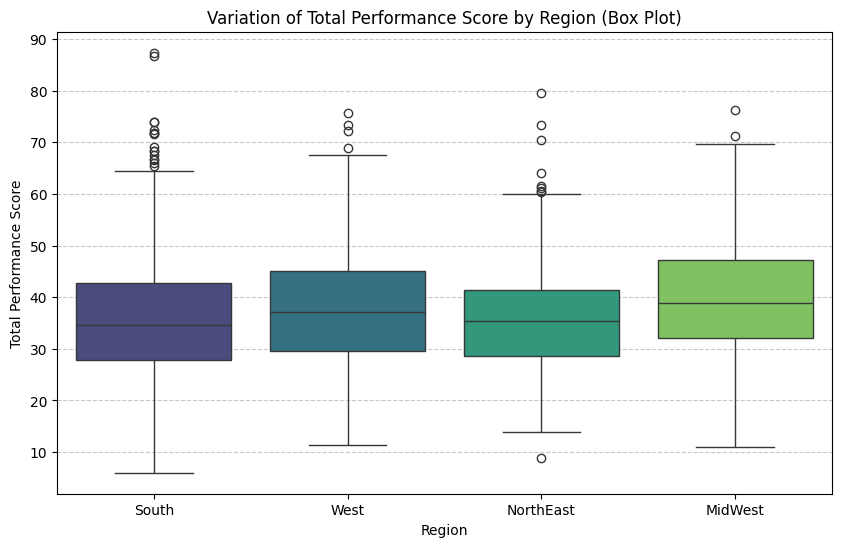

In [40]:
df_tps['Region'] = df_tps['State'].map(region_mapping)

df_tps['Total Performance Score'] = pd.to_numeric(df_tps['Total Performance Score'], errors='coerce')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Total Performance Score', data=df_tps, palette='viridis')
plt.title('Variation of Total Performance Score by Region (Box Plot)')
plt.xlabel('Region')
plt.ylabel('Total Performance Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


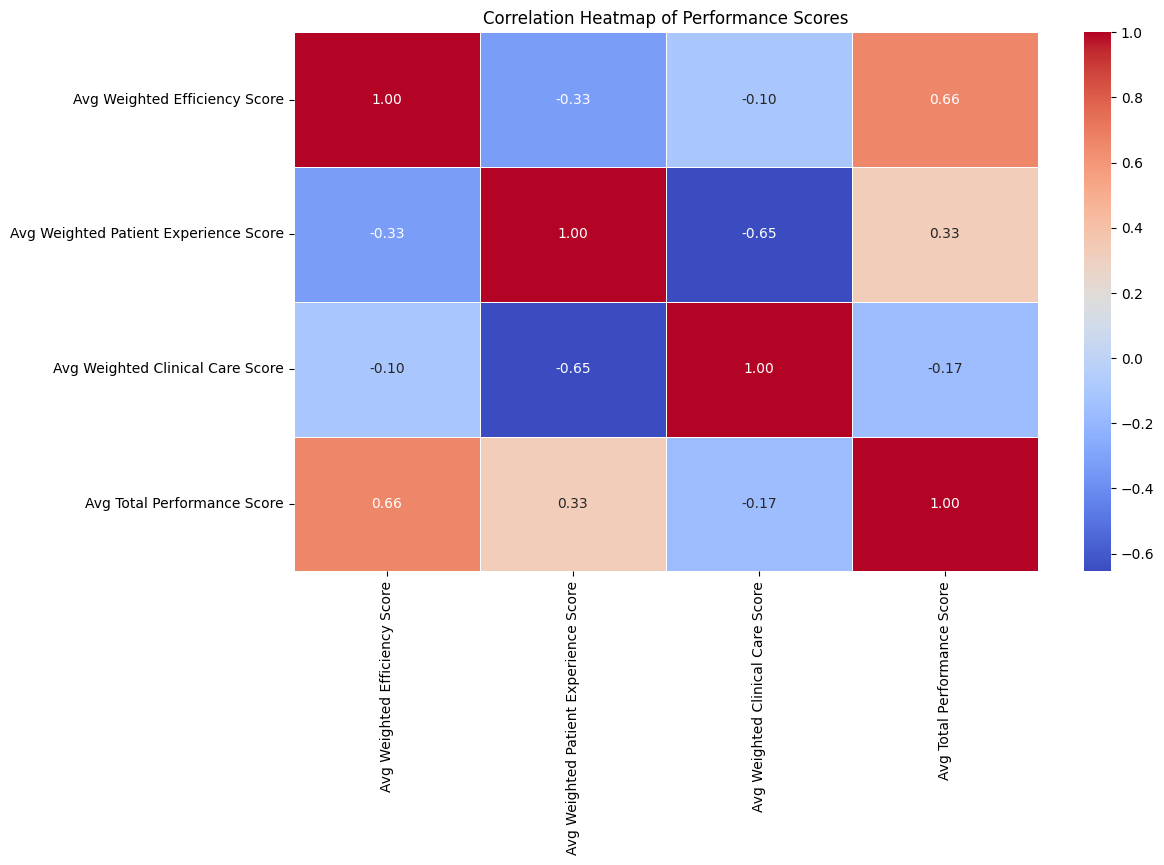

In [45]:
#Import plotting library
import matplotlib.pyplot as plt
import seaborn as sns

#Define correlation columns
correlation_columns = [
    'Avg Weighted Efficiency Score',
    'Avg Weighted Patient Experience Score',
    'Avg Weighted Clinical Care Score',
    'Avg Total Performance Score'
]

correlation_matrix = merged_regional_data[correlation_columns].corr()

#Creat heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlation Heatmap of Performance Scores')
plt.show()
